<h1><center>Beauty Product Data Shopee Scrapping</center></h1>

**Hi Everyonee!!**

As you know that there is plenty number information on the website. We can get the information free and also detail. But, sometimes we want to store the data in our file or want to make the data into CSV or Excel format. To do that is impossible if we do that manually, it's gonna take so much time. So to make it easier we can do the scrapping method with python using Beautifulsoup and selenium modules. 
<p> </p>
To do that I’m going to show you step by step. But in this script, I’m assuming that you are understood basic HTML

In [5]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

## Scraping Shopee

### Data Scraping

In [3]:
# First make a function to get a data from website link
def get_element(link, jenis_class, class_name, page):
    
    #dont forget to install first webdriver, you can choose anything you like
    driver = webdriver.Chrome(executable_path='chromedriver.exe')
    driver.get(link)

    #define number of scroll down you want to repeat
    no_of_pagedowns = page

    #find class of name that you want to start scorrilng
    elem = driver.find_element_by_tag_name("body")

    #syntac to do scroll down
    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.5)
        no_of_pagedowns-=1

    html1 = driver.page_source

    soup = BeautifulSoup(html1, 'lxml')
    
    #find the class element that you want to extract
    # for this task im using find_all because i want to get all information for the same class name
    element = soup.find_all(jenis_class, class_ = class_name)
    
    return element

In [2]:
#Extract for only specific information from the class
def get_data(data, jenis_class, nama_class):
    extract = data.find(jenis_class, class_ = nama_class)
    
    if extract is not None:
        extract = extract.text
    else:
        extract = ""
    return extract

In [4]:
def get_element_one(link, jenis_class, class_name):
    driver = webdriver.Chrome(executable_path='chromedriver.exe')
    driver.get(link)

    no_of_pagedowns = 30

    elem = driver.find_element_by_tag_name("body")

    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.2)
        no_of_pagedowns-=1

    html1 = driver.page_source

    soup = BeautifulSoup(html1, 'lxml')

    element = soup.find(jenis_class, class_ = class_name)
    
    return element

In [5]:
a = 'https://shopee.co.id/wardahofficial?page=0&sortBy=pop'

In [6]:
nama_alat=[]
harga=[]
terjual=[]

#Looping to define how many page you want to scrapping.
for j in range (1,6):
    #call function and input the link, class name of information and also number of scrolling down
    alat_alat = get_element('https://shopee.co.id/wardahofficial?page='+str(j)+'&sortBy=pop',
                            'div', 'shop-search-result-view__item col-xs-2-4', 20)
    i=0
    print(j)
    
    #Get more detail about information that we get based on previous function. 
    # In this function i want to now about the name of product, price and also total sold
    for alat in alat_alat:
        i=i+1

        #call function to get information spesific, to do that you shold input the class name that contains information detail
        #from previous function
        nama_alat_input = get_data(alat,'div','_1sRyv_ _2j2K92 _3j20V6')
        harga_input = get_data(alat,'span','_3TJGx5')
        terjual_input = get_data(alat,'div','_2Tc7Qg')

        nama_alat.append(nama_alat_input)
        harga.append(harga_input)
        terjual.append(terjual_input)

C:\Users\IDMARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  
C:\Users\IDMARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  import sys


1
2
3
4
5


In [8]:
data_web = {"Nama" : nama_alat,
            "Harga" : harga,
            "terjual":terjual}

#save output as dataframe
data_web = pd.DataFrame(data_web)

In [9]:
data_web.head()

,Nama,Harga,terjual
0,Wardah Nature Daily Aloe Hydramild Multifuncti...,34.200,10RB+ Terjual
1,Wardah Renew You Anti Aging Night Cream - Pele...,40.375,10RB+ Terjual
2,Wardah Lightening Liquid Concealer - Mencerahk...,36.000,10RB+ Terjual
3,Wardah Renew You Anti Aging Intensive Serum 17...,72.900,10RB+ Terjual
4,Wardah Colorfit Last All Day Lip Paint - Tahan...,58.500,10RB+ Terjual


In [10]:
data_web.shape

(120, 3)

In [11]:
#save to excel
data_web.to_excel("data scrappinge.xlsx")

Thats it so simple and practis. Only from the script above you can get any information from any website. 
<p> </p>
In section below im going to show you a simple information of the data that i get.

## Cleaning Data

In [6]:
data_web = pd.read_excel('data scrappinge.xlsx')
data_web.head()

,Unnamed: 0,Nama,Harga,terjual
0,0,Wardah Nature Daily Aloe Hydramild Multifuncti...,34.200,10RB+ Terjual
1,1,Wardah Renew You Anti Aging Night Cream - Pele...,40.375,10RB+ Terjual
2,2,Wardah Lightening Liquid Concealer - Mencerahk...,36.000,10RB+ Terjual
3,3,Wardah Renew You Anti Aging Intensive Serum 17...,72.900,10RB+ Terjual
4,4,Wardah Colorfit Last All Day Lip Paint - Tahan...,58.500,10RB+ Terjual


In [61]:
product_list=[]
make_up_list = ['Foundation', 'Primer', 'CC Cream', 'BB Cream', 'Tinted Moisturizer', 'Concealer', 'Eyebrow Pencil', 
                'Eyeshadow', 'Eyeliner', 'Mascara', 'Lipstick', 'tint', 'Lip Cream', 'Matte','Blush', 'Powder','Lipstik',
                'LIP Mousse', 'LIP Balm', 'Two Way Cake', 'Pensil', 'Paint', 'BROW', 'Lip Therapy', 'Face Mist', 'Eye Shadow',
               'Highlighter']
product_list = make_up_list
skincare_list = ['Micellar','Sun Battle','Face Wash', 'Toner', 'Serum','Essence','Cream', 'MOISTURIZER', 'Mask', 
                 'Sunscreen', 'Foam','Soothing Gel','Cleanser','SPOT Treatment','Moisturizing','Acne tREATMENT',
                 'Facial Wash', 'Lip Nutrition', "Gel", "Exfoliator"]
body_list = ["Deodoran","Body Mist", "Eau De Toilette","Body Scrub"]
hair_list = ["Conditioner","Shampoo",""]
product_list.extend(skincare_list)
product_list.extend(body_list)
product_list.extend(hair_list)
type_product_2 = '|'.join(str(list) for list in make_up_list)
type_product_2 = type_product_2.upper()
type_product_2

'FOUNDATION|PRIMER|CC CREAM|BB CREAM|TINTED MOISTURIZER|CONCEALER|EYEBROW PENCIL|EYESHADOW|EYELINER|MASCARA|LIPSTICK|TINT|LIP CREAM|MATTE|BLUSH|POWDER|LIPSTIK|LIP MOUSSE|LIP BALM|TWO WAY CAKE|PENSIL|PAINT|BROW|LIP THERAPY|FACE MIST|EYE SHADOW|HIGHLIGHTER|MICELLAR|SUN BATTLE|FACE WASH|TONER|SERUM|ESSENCE|CREAM|MOISTURIZER|MASK|SUNSCREEN|FOAM|SOOTHING GEL|CLEANSER|SPOT TREATMENT|MOISTURIZING|ACNE TREATMENT|FACIAL WASH|LIP NUTRITION|GEL|EXFOLIATOR|DEODORAN|BODY MIST|EAU DE TOILETTE|BODY SCRUB|CONDITIONER|SHAMPOO|'

In [62]:
data_web['type product']=data_web['Nama'].apply(lambda x: ','.join(re.findall(r'\b'+type_product_2+'\b', x.upper())))
data_web.head()

,Unnamed: 0,Nama,Harga,terjual,type product
0,0,Wardah Nature Daily Aloe Hydramild Multifuncti...,34.200,10RB+ Terjual,GEL
1,1,Wardah Renew You Anti Aging Night Cream - Pele...,40.375,10RB+ Terjual,CREAM
2,2,Wardah Lightening Liquid Concealer - Mencerahk...,36.000,10RB+ Terjual,CONCEALER
3,3,Wardah Renew You Anti Aging Intensive Serum 17...,72.900,10RB+ Terjual,"SERUM,SERUM"
4,4,Wardah Colorfit Last All Day Lip Paint - Tahan...,58.500,10RB+ Terjual,PAINT


In [63]:
data_web=data_web[data_web['type product']!=""]
data_web['type product']=data_web['type product'].apply(lambda x: x.split(',')[0])
data_web.shape

(110, 5)

In [64]:
for_lips = ['Lipstick', 'tint', 'Lip Cream', 'Matte','Lipstik', 'LIP Mousse', 'LIP Balm', 'Paint', 'Lip Therapy']
for_lips = [x.upper() for x in for_lips]
cleanser = ['Face Wash', 'Foam','Cleanser','Facial Wash']
cleanser = [x.upper() for x in cleanser]

for l in for_lips:
    data_web.loc[data_web['type product']==l, 'type product 2']='LIPS'
for c in cleanser:
    data_web.loc[data_web['type product']==c, 'type product 2']='CLEANSER'
    
data_web['type product 2'].replace('EYE SHADOW', 'EYESHADOW', inplace=True)
data_web['type product 2'].replace('Moisturizing', 'MOISTURIZER', inplace=True)

In [65]:
data_web.loc[data_web['type product 2'].isnull()==True, 'type product 2']=data_web['type product']

In [77]:
make_up_list = ['Foundation', 'Primer', 'CC Cream', 'BB Cream', 'Tinted Moisturizer', 'Concealer', 'Eyebrow Pencil', 
                'Eyeshadow', 'Eyeliner', 'Mascara', 'Lipstick', 'tint', 'Lip Cream', 'Matte','Blush', 'Powder','Lipstik',
                'LIP Mousse', 'LIP Balm', 'Two Way Cake', 'Pensil', 'Paint', 'BROW', 'Lip Therapy', 'Face Mist']
make_up_list = [x.upper() for x in make_up_list]
skincare_list = [x.upper() for x in skincare_list]
hair_list = [x.upper() for x in hair_list]
body_list = [x.upper() for x in body_list]

for m in make_up_list:
        data_web.loc[data_web['type product']==m, 'type']='MAKE UP'
for s in skincare_list:
    data_web.loc[data_web['type product']==s, 'type']='SKINCARE'
for h in hair_list:
    data_web.loc[data_web['type product']==h, 'type']='HAIRCARE'
for b in body_list:
    data_web.loc[data_web['type product']==b, 'type']='BODYCARE'

In [78]:
data_web['terjual 2'] = data_web['terjual'].apply(lambda x : x.split()[0])
data_web['terjual 2'] = data_web['terjual 2'].apply(lambda x : x.split('+')[0] if len(x.split('+'))>0 else x)
data_web['terjual 2'].replace('RB','000',regex=True, inplace=True)
data_web['terjual 2'].replace(',','',regex=True, inplace=True)
data_web['terjual 2'] = data_web['terjual 2'].astype(int)

In [79]:
group = data_web[['type','type product 2','terjual 2']].groupby(['type','type product 2'], as_index=False).mean()
group_type = group[['type','terjual 2']].groupby(['type'], as_index=False).sum()
group_type.head()

,type,terjual 2
0,BODYCARE,41000.000000
1,HAIRCARE,168000.000000
2,MAKE UP,310918.777778
3,SKINCARE,347137.544872


In [80]:
group.head()

,type,type product 2,terjual 2
0,BODYCARE,BODY MIST,10000.0
1,BODYCARE,BODY SCRUB,11000.0
2,BODYCARE,DEODORAN,10000.0
3,BODYCARE,EAU DE TOILETTE,10000.0
4,HAIRCARE,CONDITIONER,93000.0


## Nested Pie Chart

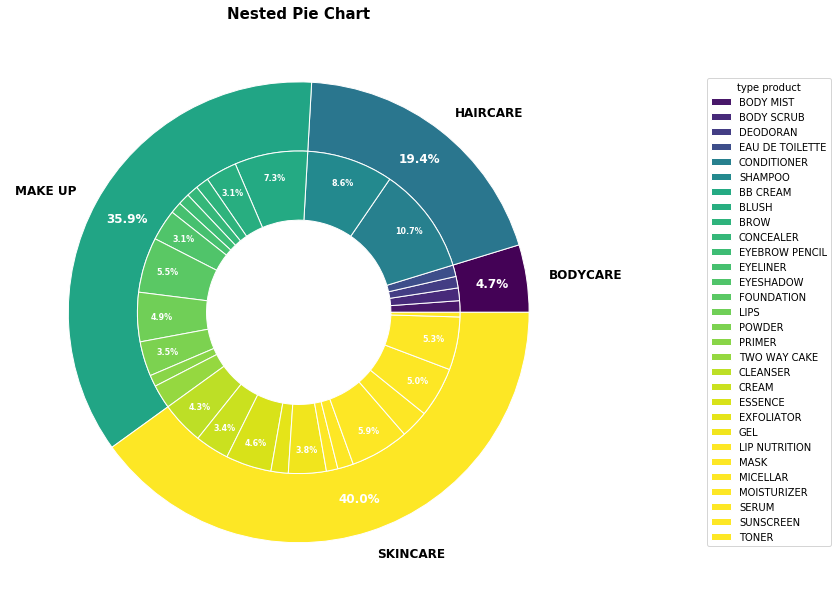

In [246]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 3, 2])

def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 3 else ''

size = 0.3

cmap = plt.get_cmap("viridis")

outer_colors = cmap(np.array([1,100,150,350]))
inner_colors = cmap(np.array([15,30,45,60,
                              110, 120, 
                              155,160,165,170,175,180,185,190,200,205,210,215,
                              230,235,240,245,250,260,270,280,290,295,300,305,310]))

_, _, autotexts = ax.pie(group_type['terjual 2'], radius=1, colors=outer_colors,labels=group_type['type'], autopct='%1.1f%%', 
                         pctdistance=0.85, wedgeprops=dict(width=size, edgecolor='w'), 
                         textprops={'fontsize': 12, 'color': 'black', 'fontweight':'bold'})
for ins in autotexts:
        ins.set_color('white')

wedges, texts, autotexts = ax.pie(group['terjual 2'], radius=1-size, colors=inner_colors, autopct=my_autopct,
                                  textprops={'fontsize': 8, 'color': 'white', 'fontweight':'bold'}, pctdistance=0.85, 
                                  wedgeprops=dict(width=size, edgecolor='w'))

ax.set_title('Nested Pie Chart', size=15, fontweight='bold')
ax.legend(wedges, group['type product 2'], title="type product", loc="center left", bbox_to_anchor=[1.2,0,0.5,1])
plt.tight_layout()
plt.show()